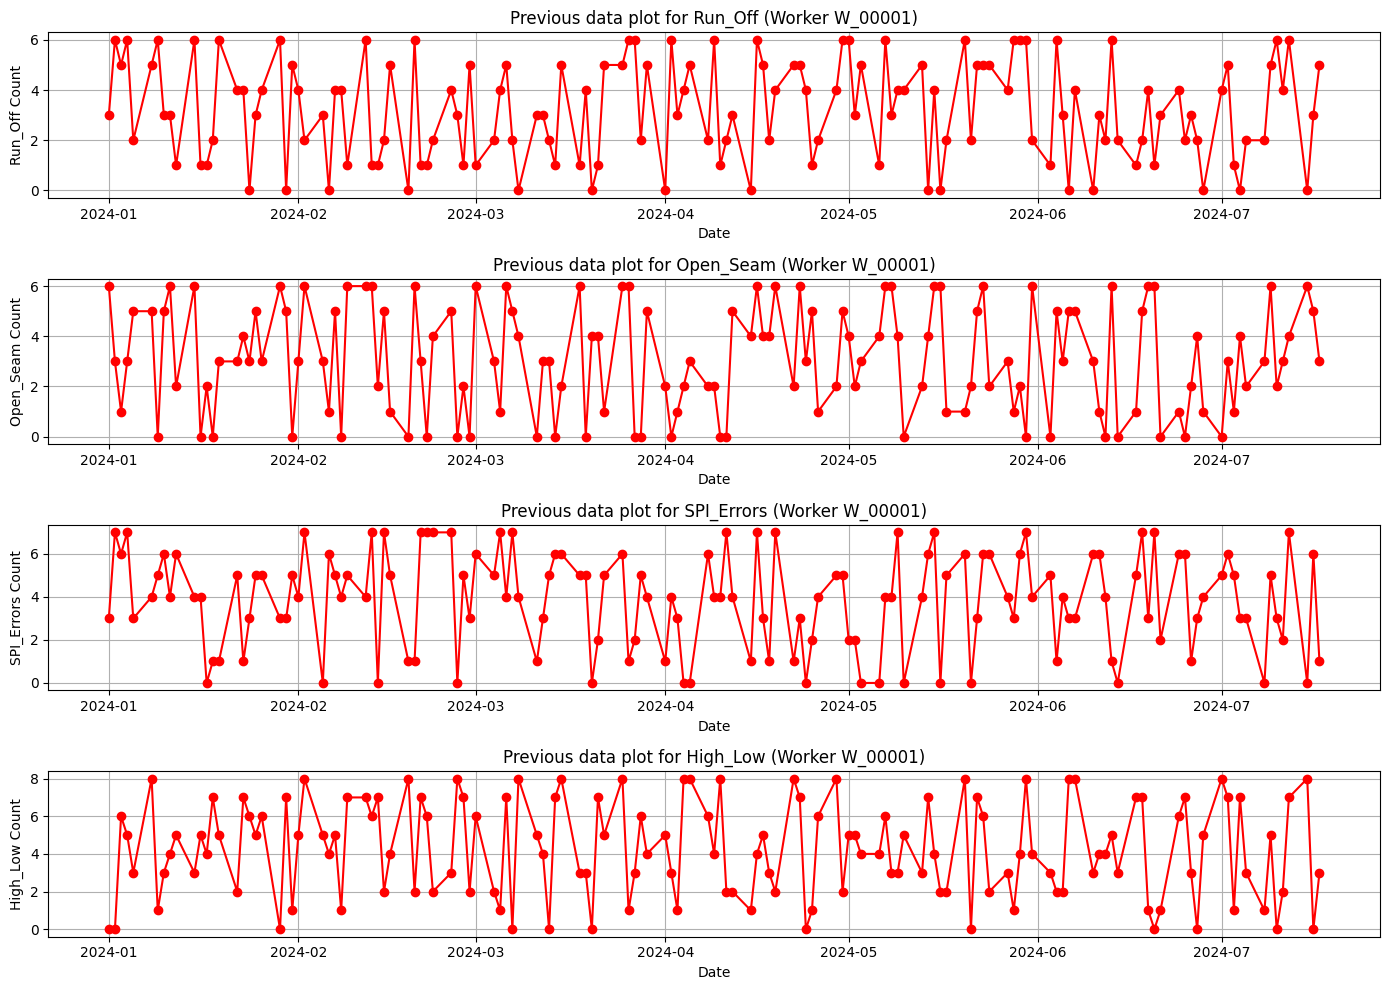

High defect type for worker W_00001: High_Low
Low defect type for worker W_00001: Open_Seam

Worker W_00001 - Last week's high defect type: Open_Seam with count: 21
Worker W_00001 - Last week's low defect type: SPI_Errors with count: 16

Training ARIMA model for Run_Off (Worker W_00001)...
RMSE for Run_Off (Worker W_00001): 2.1047273886955993


/var/folders/68/8_7nlx1973v1qqcz0zq5wt8m0000gn/T/ipykernel_6625/193643627.py:71: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  last_week_data = worker_data.last('7D')
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


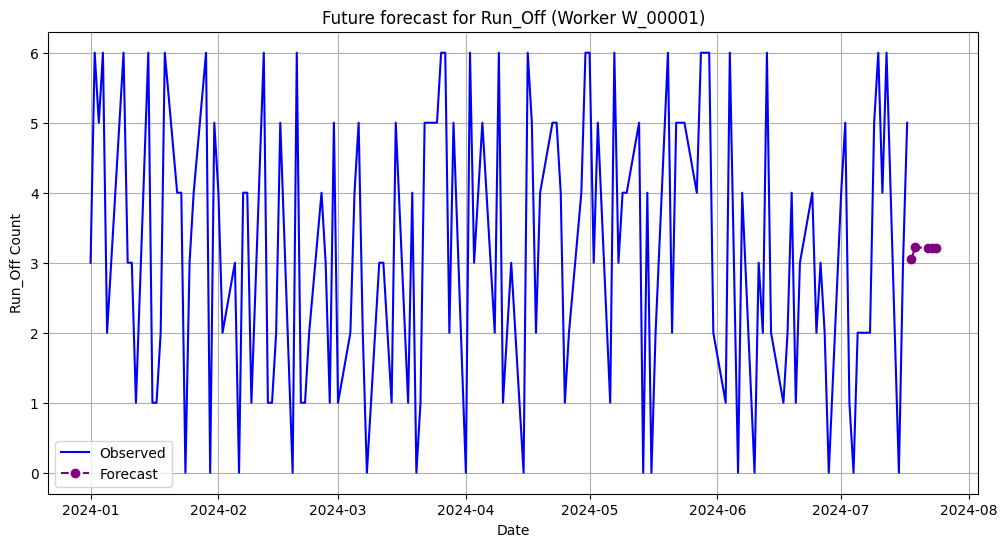

                               SARIMAX Results                                
Dep. Variable:                Run_Off   No. Observations:                  143
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -300.589
Date:                Wed, 17 Jul 2024   AIC                            607.179
Time:                        14:09:21   BIC                            616.046
Sample:                    01-01-2024   HQIC                           610.782
                         - 07-17-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0848      0.090     -0.943      0.345      -0.261       0.091
ma.L1         -0.9998      1.973     -0.507      0.612      -4.866       2.867
sigma2         3.8954      7.708      0.505      0.6

/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


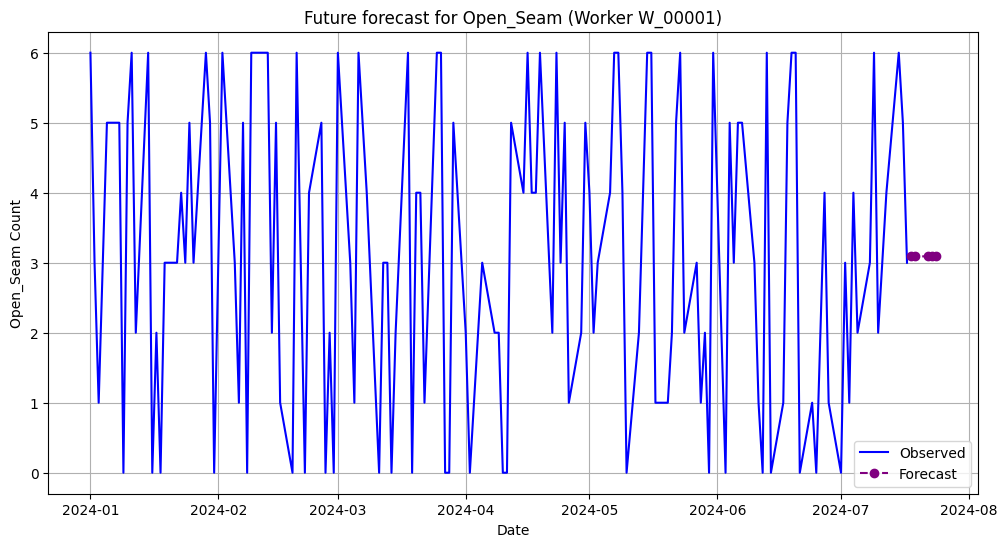

                               SARIMAX Results                                
Dep. Variable:              Open_Seam   No. Observations:                  143
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -311.514
Date:                Wed, 17 Jul 2024   AIC                            629.027
Time:                        14:09:21   BIC                            637.895
Sample:                    01-01-2024   HQIC                           632.631
                         - 07-17-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0009      0.089      0.011      0.992      -0.174       0.176
ma.L1         -0.9998      2.631     -0.380      0.704      -6.157       4.158
sigma2         4.5491     11.916      0.382      0.7

/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


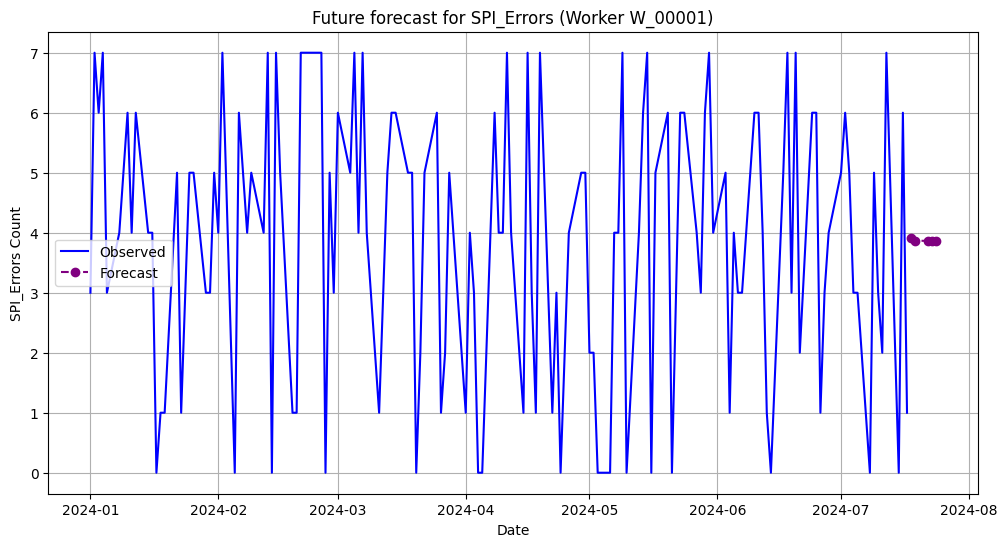

/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             SPI_Errors   No. Observations:                  143
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -319.070
Date:                Wed, 17 Jul 2024   AIC                            644.139
Time:                        14:09:21   BIC                            653.007
Sample:                    01-01-2024   HQIC                           647.742
                         - 07-17-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0141      0.081     -0.174      0.862      -0.173       0.145
ma.L1         -0.9979      0.158     -6.318      0.000      -1.307      -0.688
sigma2         5.0671      0.980      5.173      0.0

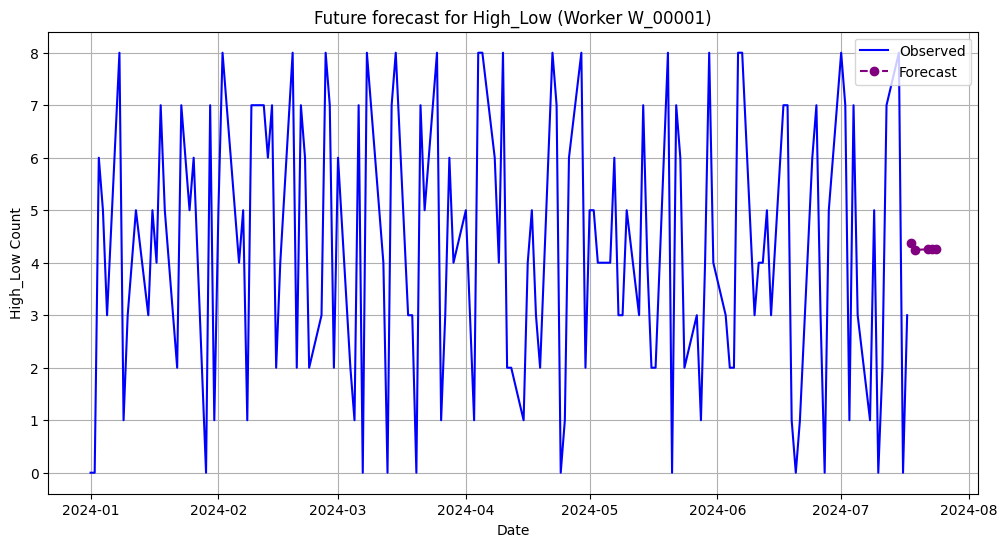

                               SARIMAX Results                                
Dep. Variable:               High_Low   No. Observations:                  143
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -335.832
Date:                Wed, 17 Jul 2024   AIC                            677.664
Time:                        14:09:21   BIC                            686.532
Sample:                    01-01-2024   HQIC                           681.268
                         - 07-17-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0904      0.085     -1.068      0.286      -0.256       0.076
ma.L1         -0.9998      2.007     -0.498      0.618      -4.934       2.934
sigma2         6.4001     12.787      0.501      0.6

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
import joblib
import os

# Load the data
# df = pd.read_csv('/Users/minu/Desktop/R24-066/Component 04/Backend/Dataset/updated_worker_defect_details.csv')
df = pd.read_csv('/Users/minu/Desktop/R24-066/Component 04/Backend/Dataset/production_data.csv')

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set Date as index
df.set_index('Date', inplace=True)

# List of defect types
defect_types = ['Run_Off', 'Open_Seam', 'SPI_Errors', 'High_Low']

# Create a directory to save the forecasts if it doesn't exist
forecast_output_dir = '/Users/minu/Desktop/R23-066/Component 04/Backend/Dataset/worker_forecasts_dataset'
model_output_dir = '/Users/minu/Desktop/R24-066/Component 04/Backend/Save_model'
os.makedirs(forecast_output_dir, exist_ok=True)
os.makedirs(model_output_dir, exist_ok=True)

def train_arima_model(data, order=(1, 1, 1), steps=5):
    model = ARIMA(data, order=order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=steps)
    return model_fit, forecast

def calculate_rmse(observed, forecast):
    mse = mean_squared_error(observed, forecast)
    rmse = np.sqrt(mse)
    return rmse

def forecast_for_worker(worker_id, forecast_steps=5):
    worker_data = df[df['Worker_ID'] == worker_id]
    
    if worker_data.empty:
        print(f"No data found for worker {worker_id}.")
        return

    # Plotting time series for each defect type for the selected worker
    plt.figure(figsize=(14, 10))
    for i, defect_type in enumerate(defect_types, 1):
        plt.subplot(len(defect_types), 1, i)
        plt.plot(worker_data.index, worker_data[defect_type], marker='o', linestyle='-', color='red')
        plt.title(f'Previous data plot for {defect_type} (Worker {worker_id})')
        plt.xlabel('Date')
        plt.ylabel(f'{defect_type} Count')
        plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Calculate summary statistics for each defect type for the selected worker
    summary_stats = worker_data[defect_types].agg(['mean', 'sum']).transpose()

    # Determine high and low defect types for the selected worker
    high_defect_type = summary_stats['mean'].idxmax()
    low_defect_type = summary_stats['mean'].idxmin()

    print(f"High defect type for worker {worker_id}: {high_defect_type}")
    print(f"Low defect type for worker {worker_id}: {low_defect_type}")

    print()

    # Calculate last week's high and low defect counts for the selected worker
    last_week_data = worker_data.last('7D')
    last_week_summary = last_week_data[defect_types].sum()
    last_week_high_defect_type = last_week_summary.idxmax()
    last_week_low_defect_type = last_week_summary.idxmin()
    last_week_high_defect_count = last_week_summary.max()
    last_week_low_defect_count = last_week_summary.min()

    print(f"Worker {worker_id} - Last week's high defect type: {last_week_high_defect_type} with count: {last_week_high_defect_count}")
    print(f"Worker {worker_id} - Last week's low defect type: {last_week_low_defect_type} with count: {last_week_low_defect_count}")

    print()

    # Train ARIMA models and make forecasts for each defect type for the selected worker
    time_series_forecasts = pd.DataFrame(index=pd.date_range(start=worker_data.index[-1], periods=forecast_steps + 1, freq='B')[1:])
    
    for defect_type in defect_types:
        print(f"Training ARIMA model for {defect_type} (Worker {worker_id})...")
        model_fit, forecast = train_arima_model(worker_data[defect_type], steps=forecast_steps)
        time_series_forecasts[defect_type] = forecast

        # Calculate RMSE
        if len(worker_data[defect_type]) >= forecast_steps:
            rmse = calculate_rmse(worker_data[defect_type][-forecast_steps:], forecast)
            print(f"RMSE for {defect_type} (Worker {worker_id}): {rmse}")

        # Plotting the results
        plt.figure(figsize=(12, 6))
        plt.plot(worker_data.index, worker_data[defect_type], label='Observed', color='blue')
        future_dates = pd.date_range(start=worker_data.index[-1], periods=forecast_steps + 1, freq='B')[1:]
        plt.plot(future_dates, forecast, label='Forecast', linestyle='--', marker='o', color='purple')
        plt.title(f'Future forecast for {defect_type} (Worker {worker_id})')
        plt.xlabel('Date')
        plt.ylabel(f'{defect_type} Count')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Print model summary
        print(model_fit.summary())
    
    # Save time series forecasts for the current worker
    forecast_file = os.path.join(forecast_output_dir, f'time_series_forecasts_worker_{worker_id}.csv')
    time_series_forecasts.to_csv(forecast_file)

    # Save the ARIMA models for the current worker (optional)
    model_file = os.path.join(model_output_dir, f'arima_model_worker_{worker_id}.pkl')
    joblib.dump(model_fit, model_file)

# Prompt user to select a worker ID and forecast
worker_id = input("Enter the Worker ID: ")
forecast_for_worker(worker_id)

Training ARIMA model for Run_Off...
RMSE for Run_Off: 1.964911313741262


/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-

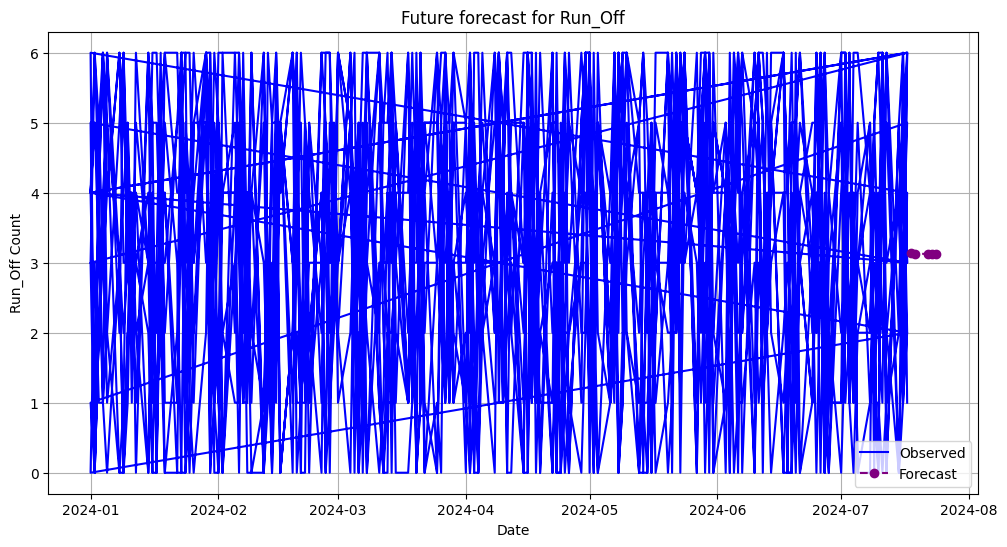

                               SARIMAX Results                                
Dep. Variable:                Run_Off   No. Observations:                 1430
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3016.250
Date:                Wed, 17 Jul 2024   AIC                           6038.500
Time:                        14:12:43   BIC                           6054.294
Sample:                             0   HQIC                          6044.398
                               - 1430                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0078      0.027     -0.291      0.771      -0.060       0.045
ma.L1         -0.9999      0.069    -14.408      0.000      -1.136      -0.864
sigma2         3.9692      0.365     10.885      0.0

/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-

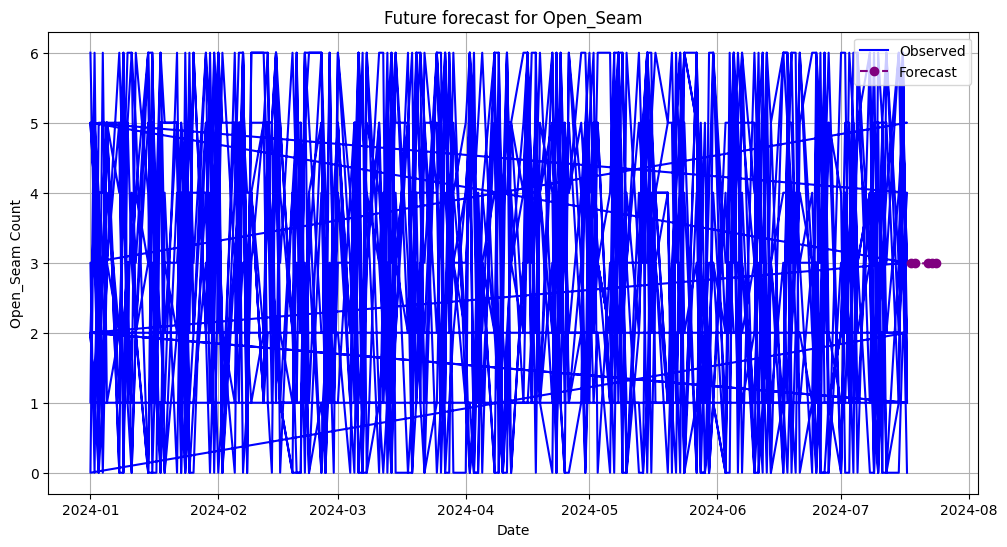

                               SARIMAX Results                                
Dep. Variable:              Open_Seam   No. Observations:                 1430
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3023.037
Date:                Wed, 17 Jul 2024   AIC                           6052.074
Time:                        14:12:43   BIC                           6067.868
Sample:                             0   HQIC                          6057.972
                               - 1430                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0020      0.027     -0.074      0.941      -0.054       0.050
ma.L1         -1.0000      0.236     -4.233      0.000      -1.463      -0.537
sigma2         4.0068      0.979      4.094      0.0

/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-

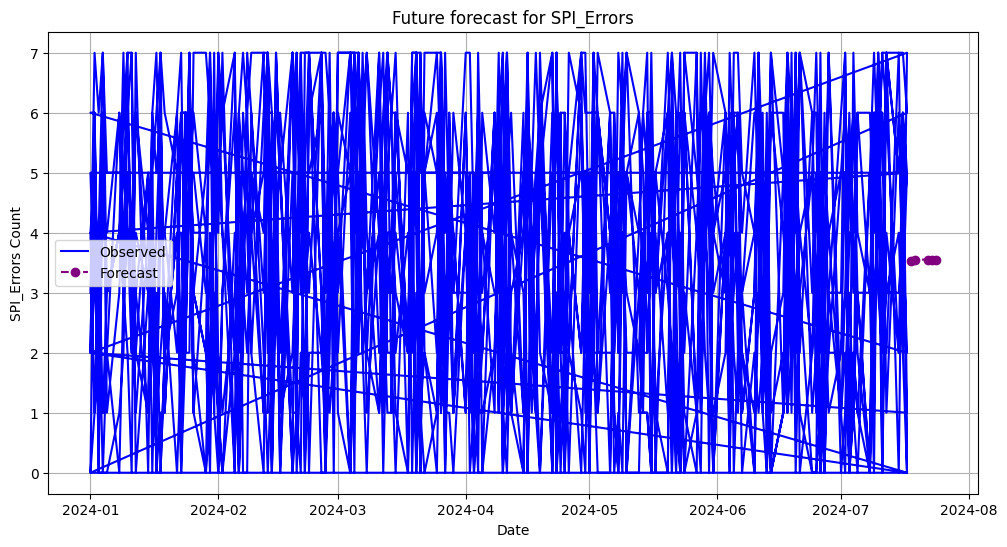

                               SARIMAX Results                                
Dep. Variable:             SPI_Errors   No. Observations:                 1430
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3213.469
Date:                Wed, 17 Jul 2024   AIC                           6432.937
Time:                        14:12:43   BIC                           6448.732
Sample:                             0   HQIC                          6438.836
                               - 1430                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0156      0.026     -0.588      0.556      -0.067       0.036
ma.L1         -0.9959      0.003   -343.481      0.000      -1.002      -0.990
sigma2         5.2395      0.309     16.943      0.0

/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-

RMSE for High_Low: 2.713760678979807


/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


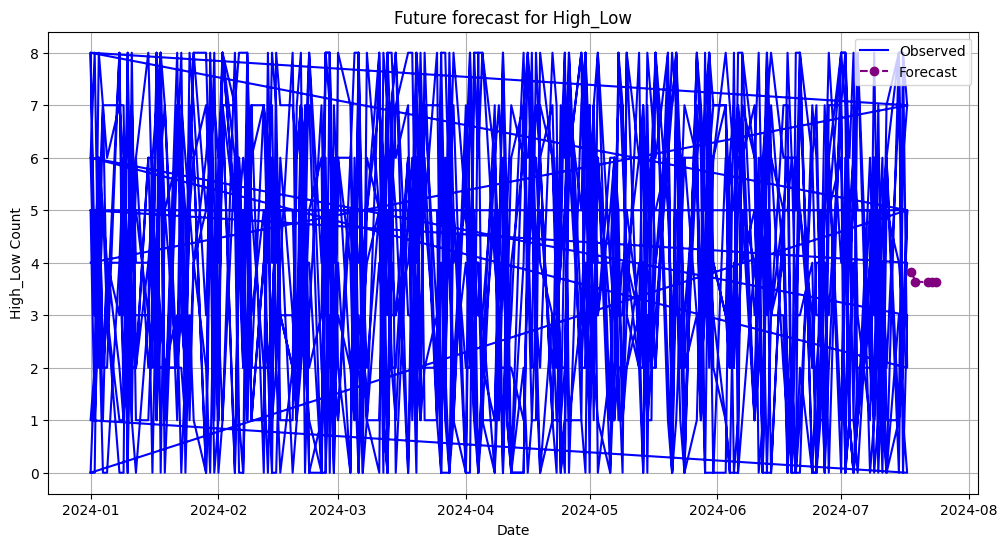

                               SARIMAX Results                                
Dep. Variable:               High_Low   No. Observations:                 1430
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3385.254
Date:                Wed, 17 Jul 2024   AIC                           6776.509
Time:                        14:12:43   BIC                           6792.303
Sample:                             0   HQIC                          6782.407
                               - 1430                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0605      0.027      2.275      0.023       0.008       0.113
ma.L1         -0.9937      0.003   -292.276      0.000      -1.000      -0.987
sigma2         6.6662      0.401     16.612      0.0

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
import joblib
import os

# Load the data
# df = pd.read_csv('/Users/minu/Desktop/test_heroku/Component 04/Backend/Dataset/updated_worker_defect_details.csv')
df = pd.read_csv('/Users/minu/Desktop/R24-066/Component 04/Backend/Dataset/production_data.csv')

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set Date as index
df.set_index('Date', inplace=True)

# List of defect types
defect_types = ['Run_Off', 'Open_Seam', 'SPI_Errors', 'High_Low']

# Create a directory to save the forecasts if it doesn't exist
forecast_output_dir = '/Users/minu/Desktop/test_heroku/Component 04/Backend/Dataset/worker_forecasts_dataset'
model_output_dir = '/Users/minu/Desktop/test_heroku/Component 04/Backend/Save_model'
os.makedirs(forecast_output_dir, exist_ok=True)
os.makedirs(model_output_dir, exist_ok=True)

def train_arima_model(data, order=(1, 1, 1), steps=5):
    model = ARIMA(data, order=order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=steps)
    return model_fit, forecast

def calculate_rmse(observed, forecast):
    mse = mean_squared_error(observed, forecast)
    rmse = np.sqrt(mse)
    return rmse

# Train ARIMA models and make forecasts for each defect type
time_series_forecasts = pd.DataFrame(index=pd.date_range(start=df.index[-1], periods=6, freq='B')[1:])

for defect_type in defect_types:
    print(f"Training ARIMA model for {defect_type}...")
    model_fit, forecast = train_arima_model(df[defect_type], steps=5)
    time_series_forecasts[defect_type] = forecast

    # Calculate RMSE
    if len(df[defect_type]) >= 5:
        rmse = calculate_rmse(df[defect_type][-5:], forecast)
        print(f"RMSE for {defect_type}: {rmse}")

    # Plotting the results
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df[defect_type], label='Observed', color='blue')
    future_dates = pd.date_range(start=df.index[-1], periods=6, freq='B')[1:]
    plt.plot(future_dates, forecast, label='Forecast', linestyle='--', marker='o', color='purple')
    plt.title(f'Future forecast for {defect_type}')
    plt.xlabel('Date')
    plt.ylabel(f'{defect_type} Count')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print model summary
    print(model_fit.summary())

# Save time series forecasts for later use in fusion model
time_series_forecasts.to_csv(os.path.join(forecast_output_dir, 'time_series_forecasts.csv'))

# Save the ARIMA models for each defect type
for defect_type in defect_types:
    model_file = os.path.join(model_output_dir, f'arima_model_{defect_type}.pkl')
    joblib.dump(model_fit, model_file)

Training ARIMA model for Run_Off...
RMSE for Run_Off: 2.484845222789259


/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-

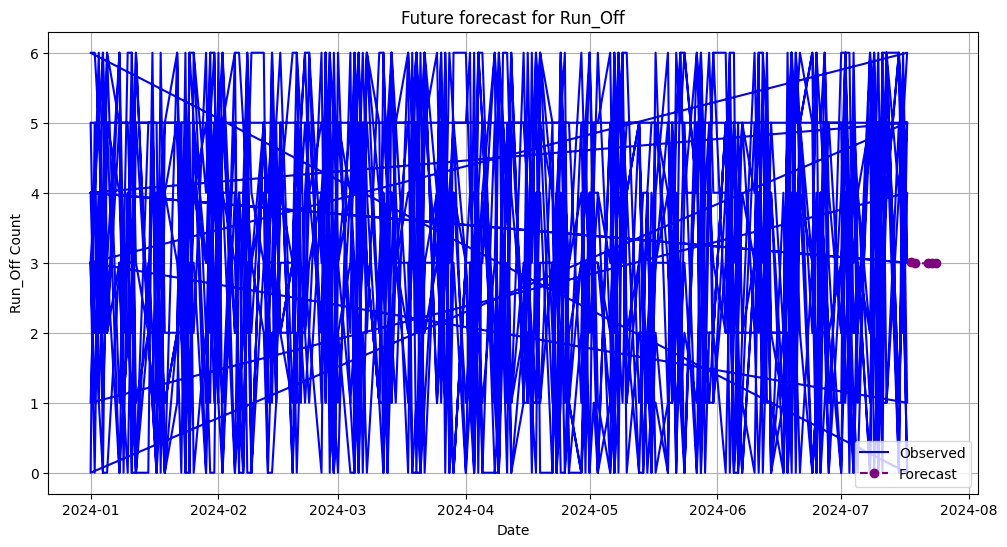

                               SARIMAX Results                                
Dep. Variable:                Run_Off   No. Observations:                 1430
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3002.488
Date:                Fri, 19 Jul 2024   AIC                           6010.977
Time:                        20:53:02   BIC                           6026.771
Sample:                             0   HQIC                          6016.875
                               - 1430                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0081      0.027     -0.300      0.764      -0.061       0.045
ma.L1         -0.9998      0.028    -35.297      0.000      -1.055      -0.944
sigma2         3.8938      0.260     15.005      0.0

/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-

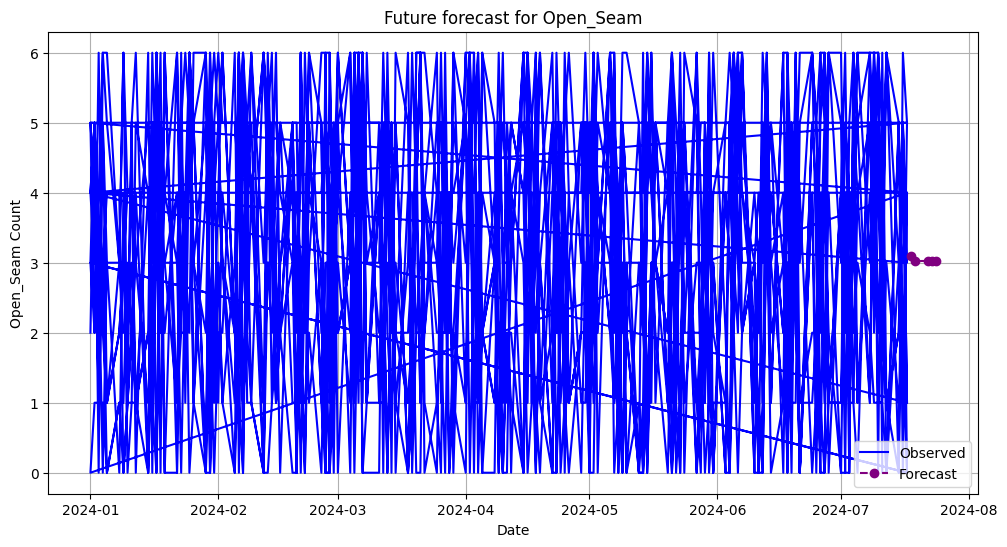

                               SARIMAX Results                                
Dep. Variable:              Open_Seam   No. Observations:                 1430
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3005.405
Date:                Fri, 19 Jul 2024   AIC                           6016.811
Time:                        20:53:02   BIC                           6032.605
Sample:                             0   HQIC                          6022.709
                               - 1430                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0321      0.027     -1.195      0.232      -0.085       0.021
ma.L1         -0.9998      0.023    -43.856      0.000      -1.045      -0.955
sigma2         3.9095      0.248     15.777      0.0

/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-

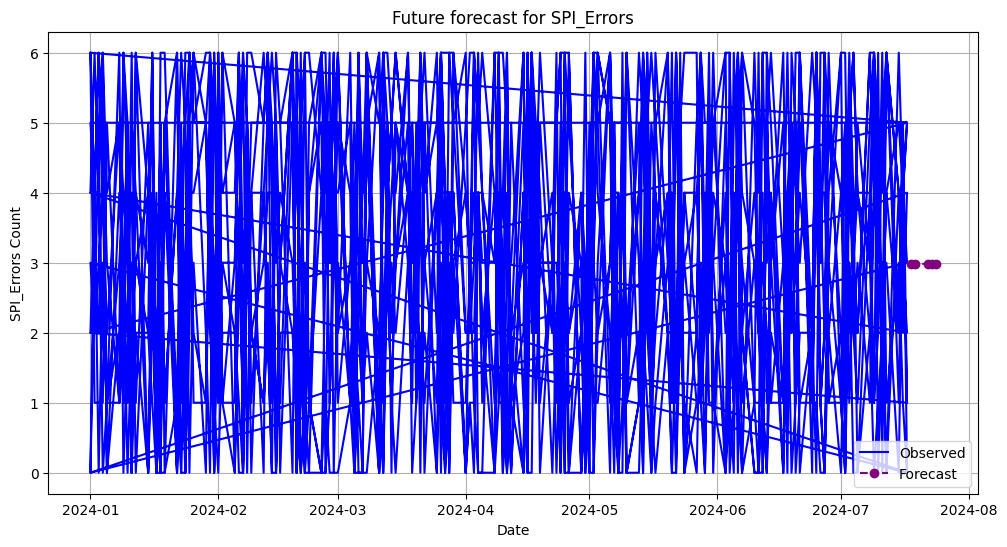

                               SARIMAX Results                                
Dep. Variable:             SPI_Errors   No. Observations:                 1430
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3045.854
Date:                Fri, 19 Jul 2024   AIC                           6097.707
Time:                        20:53:03   BIC                           6113.501
Sample:                             0   HQIC                          6103.605
                               - 1430                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0007      0.027     -0.027      0.979      -0.053       0.051
ma.L1         -0.9998      0.018    -55.054      0.000      -1.035      -0.964
sigma2         4.1377      0.267     15.509      0.0

/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-

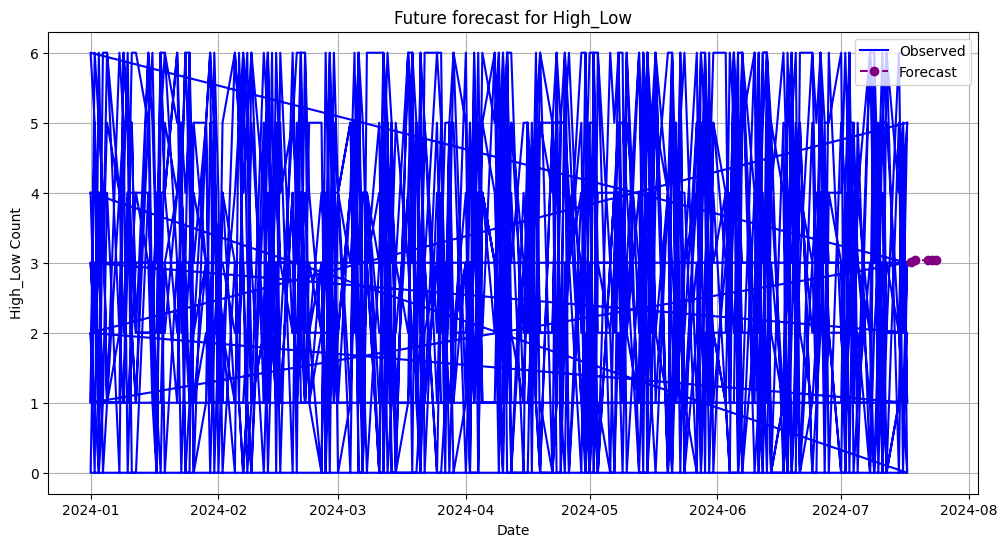

                               SARIMAX Results                                
Dep. Variable:               High_Low   No. Observations:                 1430
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3009.585
Date:                Fri, 19 Jul 2024   AIC                           6025.171
Time:                        20:53:03   BIC                           6040.965
Sample:                             0   HQIC                          6031.069
                               - 1430                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0096      0.026     -0.366      0.714      -0.061       0.042
ma.L1         -0.9966      0.003   -321.426      0.000      -1.003      -0.991
sigma2         3.9384      0.238     16.577      0.0

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
import joblib
import os

# Load the data
data_path = '/Users/minu/Desktop/R24-066/Component 04/Backend/Dataset/production_data.csv'
df = pd.read_csv(data_path)

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set Date as index
df.set_index('Date', inplace=True)

# List of defect types
defect_types = ['Run_Off', 'Open_Seam', 'SPI_Errors', 'High_Low']

# Create a directory to save the forecasts if it doesn't exist
forecast_output_dir = '/Users/minu/Desktop/R24-066/Component 04/Backend/Dataset/worker_forecasts_dataset'
model_output_dir = '/Users/minu/Desktop/R24-066/Component 04/Backend/Save_model'
os.makedirs(forecast_output_dir, exist_ok=True)
os.makedirs(model_output_dir, exist_ok=True)

def train_arima_model(data, order=(1, 1, 1), steps=5):
    model = ARIMA(data, order=order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=steps)
    return model_fit, forecast

def calculate_rmse(observed, forecast):
    mse = mean_squared_error(observed, forecast)
    rmse = np.sqrt(mse)
    return rmse

# Train ARIMA models and make forecasts for each defect type
time_series_forecasts = pd.DataFrame(index=pd.date_range(start=df.index[-1], periods=6, freq='B')[1:])

for defect_type in defect_types:
    print(f"Training ARIMA model for {defect_type}...")
    model_fit, forecast = train_arima_model(df[defect_type], steps=5)
    time_series_forecasts[defect_type] = forecast

    # Calculate RMSE
    if len(df[defect_type]) >= 5:
        rmse = calculate_rmse(df[defect_type][-5:], forecast)
        print(f"RMSE for {defect_type}: {rmse}")

    # Plotting the results
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df[defect_type], label='Observed', color='blue')
    future_dates = pd.date_range(start=df.index[-1], periods=6, freq='B')[1:]
    plt.plot(future_dates, forecast, label='Forecast', linestyle='--', marker='o', color='purple')
    plt.title(f'Future forecast for {defect_type}')
    plt.xlabel('Date')
    plt.ylabel(f'{defect_type} Count')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print model summary
    print(model_fit.summary())

    # Save the ARIMA model for the defect type
    model_file = os.path.join(model_output_dir, f'arima_model_{defect_type}.pkl')
    joblib.dump(model_fit, model_file)

# Save time series forecasts for later use in fusion model
time_series_forecasts.to_csv(os.path.join(forecast_output_dir, 'time_series_forecasts.csv'))

/var/folders/68/8_7nlx1973v1qqcz0zq5wt8m0000gn/T/ipykernel_18965/3601758044.py:24: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  df_last_3_months = df.last('3M')
/var/folders/68/8_7nlx1973v1qqcz0zq5wt8m0000gn/T/ipykernel_18965/3601758044.py:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_last_3_months = df.last('3M')
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels

Training ARIMA model for Run_Off on last 3 months data...
RMSE for Run_Off: 2.483666864982761


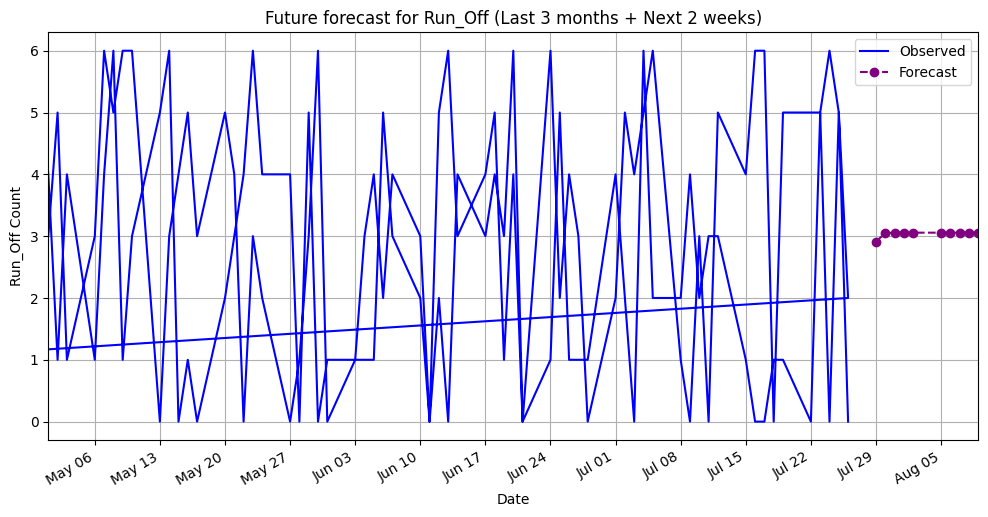

                               SARIMAX Results                                
Dep. Variable:                Run_Off   No. Observations:                  213
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -455.494
Date:                Fri, 26 Jul 2024   AIC                            916.988
Time:                        10:18:02   BIC                            927.058
Sample:                             0   HQIC                           921.058
                                - 213                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0468      0.075      0.625      0.532      -0.100       0.193
ma.L1         -0.9989      0.145     -6.868      0.000      -1.284      -0.714
sigma2         4.2012      0.909      4.621      0.0

/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-

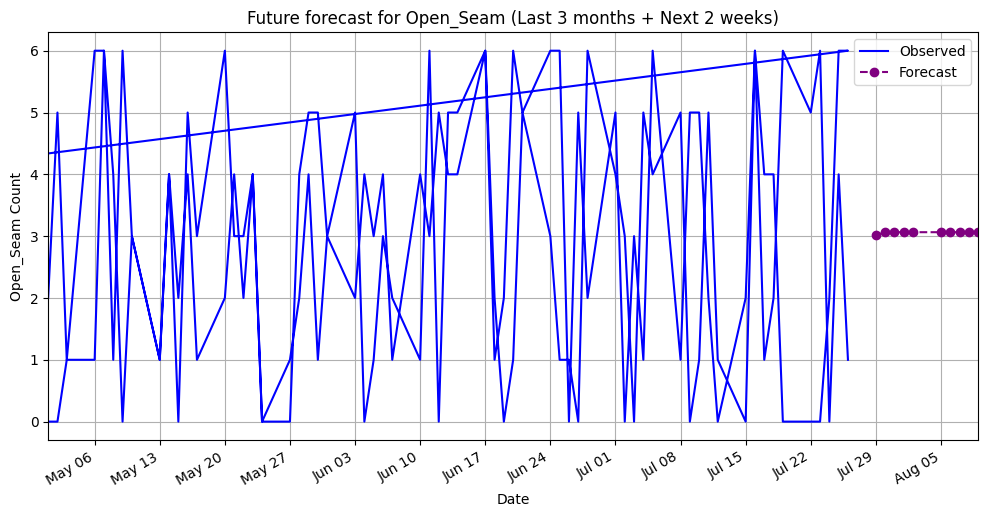

                               SARIMAX Results                                
Dep. Variable:              Open_Seam   No. Observations:                  213
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -454.265
Date:                Fri, 26 Jul 2024   AIC                            914.531
Time:                        10:18:02   BIC                            924.600
Sample:                             0   HQIC                           918.601
                                - 213                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0245      0.075      0.326      0.744      -0.123       0.172
ma.L1         -0.9927      0.023    -42.743      0.000      -1.038      -0.947
sigma2         4.1709      0.625      6.677      0.0

/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-

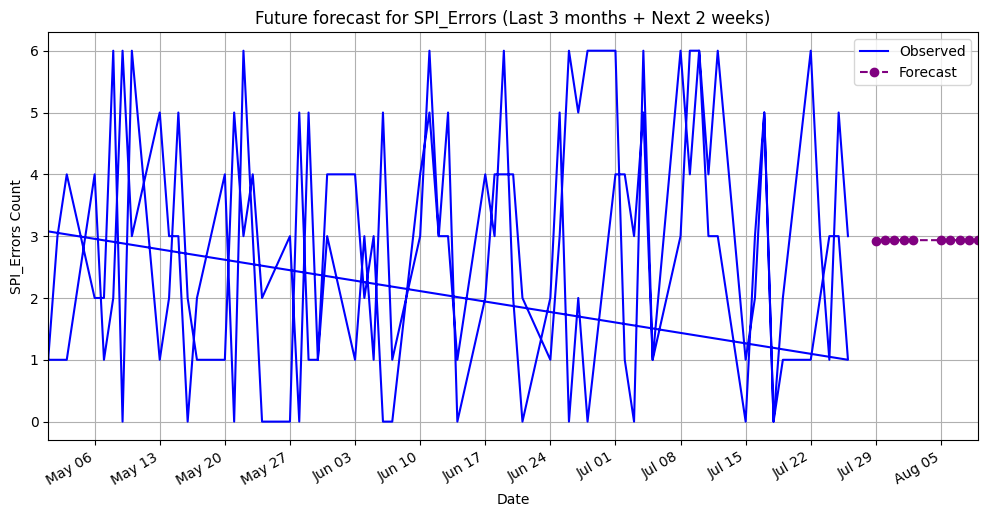

                               SARIMAX Results                                
Dep. Variable:             SPI_Errors   No. Observations:                  213
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -442.971
Date:                Fri, 26 Jul 2024   AIC                            891.942
Time:                        10:18:02   BIC                            902.012
Sample:                             0   HQIC                           896.012
                                - 213                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1527      0.072     -2.123      0.034      -0.294      -0.012
ma.L1         -0.9994      0.356     -2.807      0.005      -1.697      -0.302
sigma2         3.7244      1.375      2.709      0.0

/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-

RMSE for High_Low: 2.3262474392080232


/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


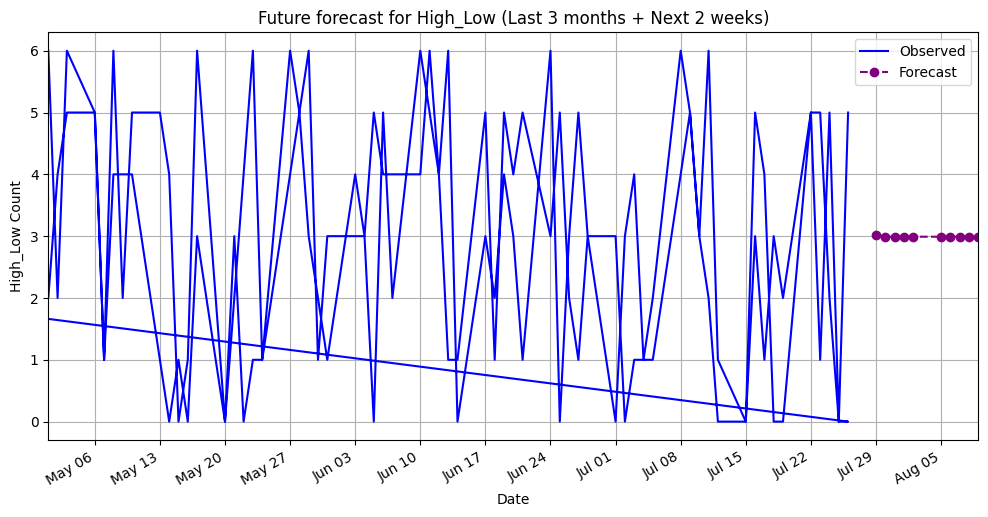

                               SARIMAX Results                                
Dep. Variable:               High_Low   No. Observations:                  213
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -448.396
Date:                Fri, 26 Jul 2024   AIC                            902.791
Time:                        10:18:03   BIC                            912.861
Sample:                             0   HQIC                           906.861
                                - 213                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0155      0.073      0.212      0.832      -0.128       0.159
ma.L1         -0.9999      2.511     -0.398      0.690      -5.921       3.921
sigma2         3.9242      9.799      0.400      0.6

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
import joblib
import os

# Load the data
data_path = '/Users/minu/Desktop/R24-066/Component 04/Backend/Dataset/worker_defect_production_data.csv'
df = pd.read_csv(data_path)

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set Date as index
df.set_index('Date', inplace=True)

# List of defect types
defect_types = ['Run_Off', 'Open_Seam', 'SPI_Errors', 'High_Low']

# Filter data for the last 3 months
df_last_3_months = df.last('3M')

# Create a directory to save the forecasts if it doesn't exist
forecast_output_dir = '/Users/minu/Desktop/R24-066/Component 04/Backend/Dataset/worker_forecasts_dataset'
model_output_dir = '/Users/minu/Desktop/R24-066/Component 04/Backend/Save_model'
os.makedirs(forecast_output_dir, exist_ok=True)
os.makedirs(model_output_dir, exist_ok=True)

def train_arima_model(data, order=(1, 1, 1), steps=10):
    model = ARIMA(data, order=order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=steps)
    return model_fit, forecast

def calculate_rmse(observed, forecast):
    mse = mean_squared_error(observed, forecast)
    rmse = np.sqrt(mse)
    return rmse

# Train ARIMA models and make forecasts for each defect type
time_series_forecasts = pd.DataFrame(index=pd.date_range(start=df_last_3_months.index[-1], periods=11, freq='B')[1:])

for defect_type in defect_types:
    print(f"Training ARIMA model for {defect_type} on last 3 months data...")
    model_fit, forecast = train_arima_model(df_last_3_months[defect_type], steps=10)
    time_series_forecasts[defect_type] = forecast

    # Calculate RMSE only if the forecast can be compared with observed data
    if len(df_last_3_months[defect_type]) >= 10:
        rmse = calculate_rmse(df_last_3_months[defect_type][-10:], forecast)
        print(f"RMSE for {defect_type}: {rmse}")

    # Plotting the results
    plt.figure(figsize=(12, 6))
    plt.plot(df_last_3_months.index, df_last_3_months[defect_type], label='Observed', color='blue')
    future_dates = pd.date_range(start=df_last_3_months.index[-1], periods=11, freq='B')[1:]
    plt.plot(future_dates, forecast, label='Forecast', linestyle='--', marker='o', color='purple')
    plt.title(f'Future forecast for {defect_type} (Last 3 months + Next 2 weeks)')
    plt.xlabel('Date')
    plt.ylabel(f'{defect_type} Count')
    plt.legend()
    plt.grid(True)

    # Format the x-axis for better readability and set limits to focus on the last 3 months + forecast
    plt.xlim([df_last_3_months.index[0], future_dates[-1]])
    plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MO))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    plt.gcf().autofmt_xdate()

    plt.show()

    # Print model summary
    print(model_fit.summary())

    # Save the ARIMA model for the defect type
    model_file = os.path.join(model_output_dir, f'arima_model_{defect_type}.pkl')
    joblib.dump(model_fit, model_file)

# Save time series forecasts for later use in the fusion model
time_series_forecasts.to_csv(os.path.join(forecast_output_dir, 'time_series_forecasts_last_3_months.csv'))
